In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
 rd = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Mall_Customers.csv")

In [4]:
rd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
rd.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


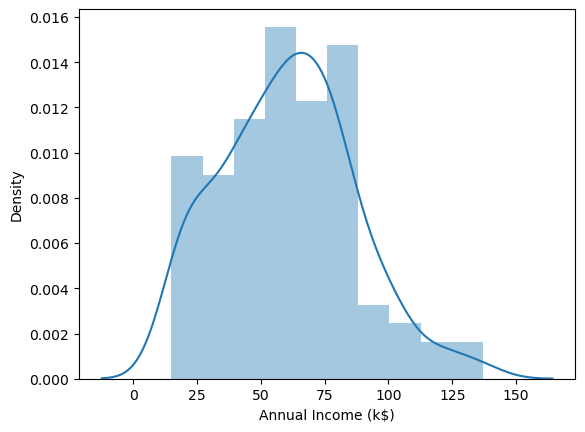

In [7]:
sns.distplot(rd["Annual Income (k$)"]);

In [8]:
rd.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

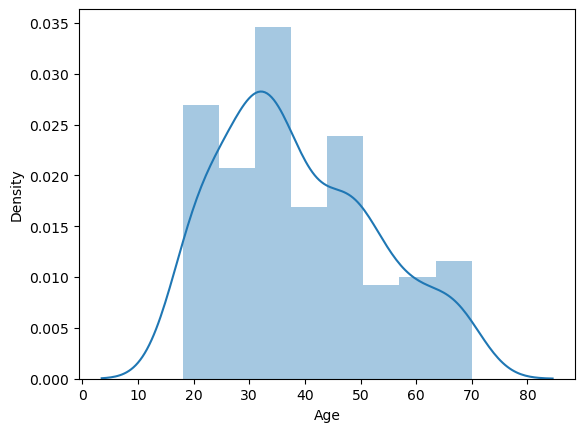

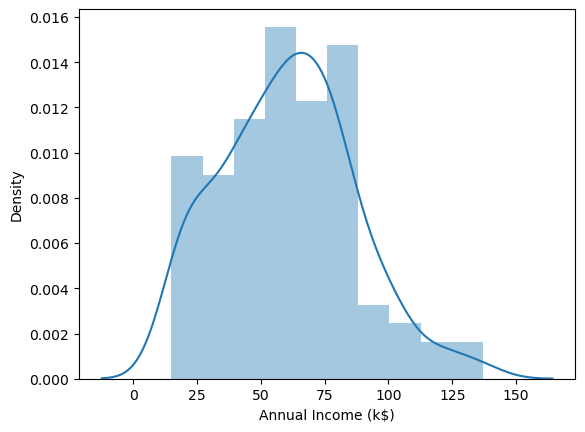

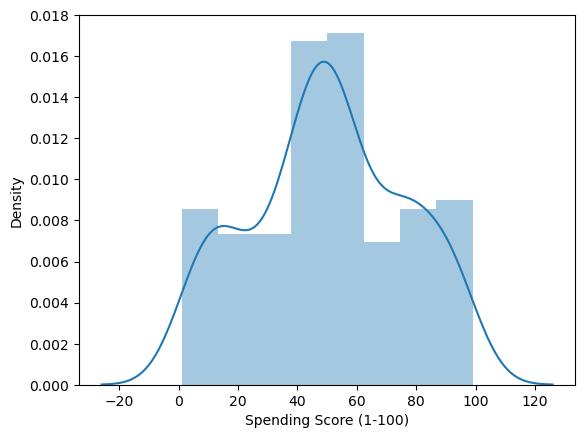

In [9]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(rd[i])

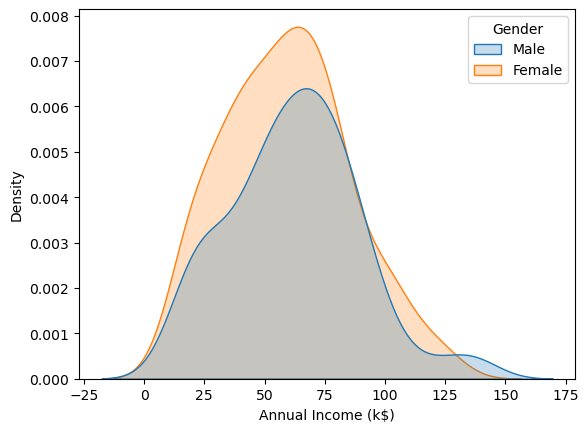

In [22]:
sns.kdeplot(data=rd, x="Annual Income (k$)", hue="Gender", fill=True);

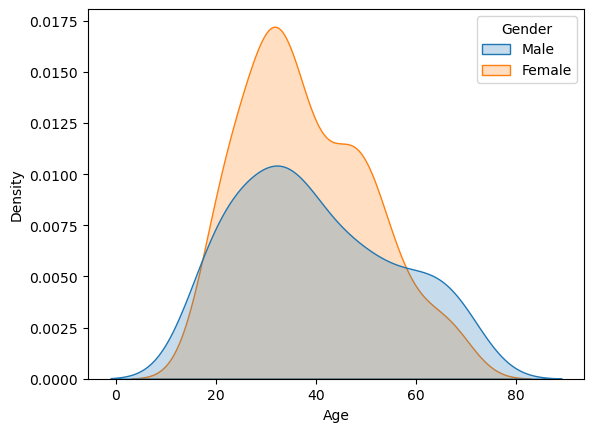

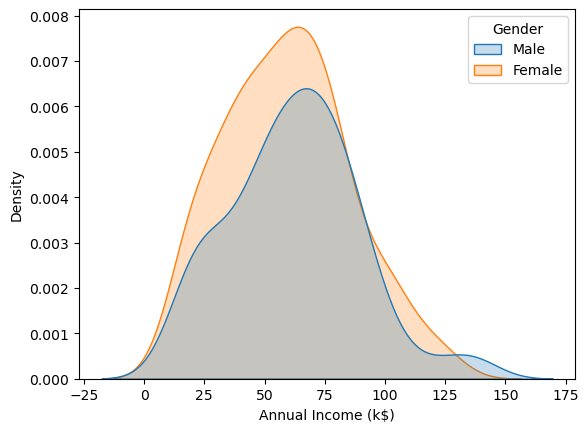

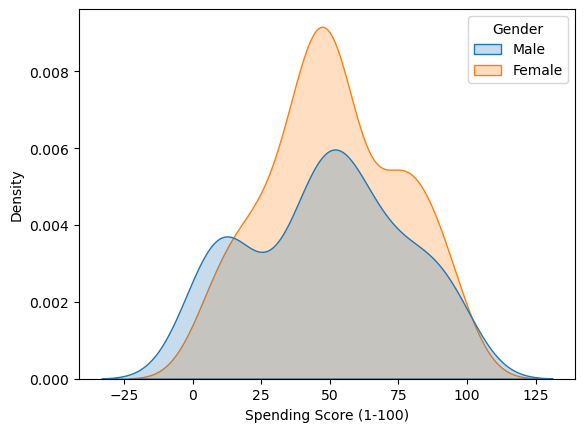

In [23]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=rd, x=i, hue="Gender", fill=True)

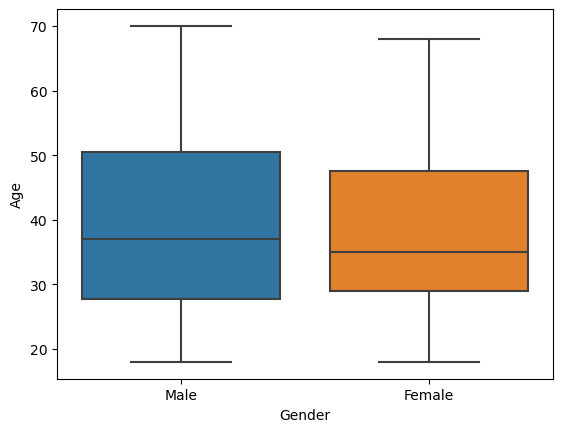

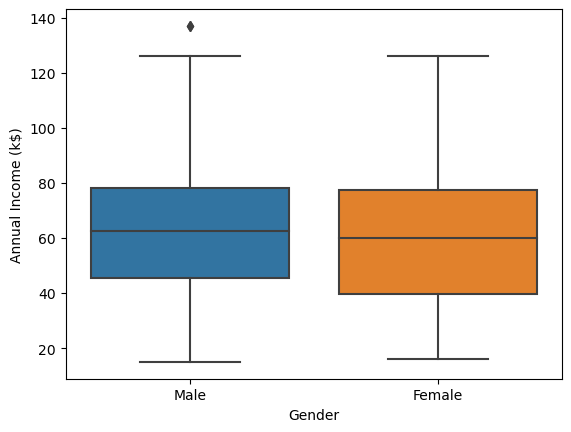

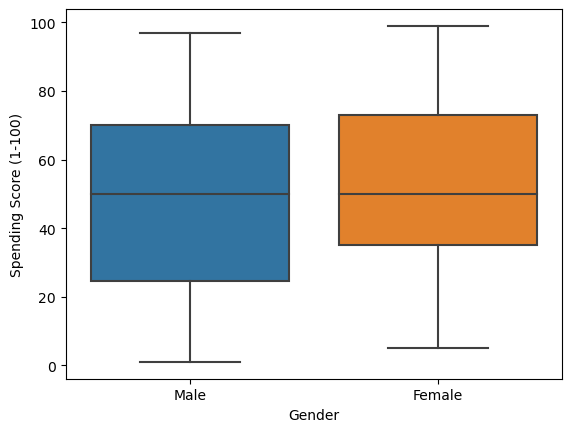

In [24]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=rd,x='Gender',y=rd[i])

In [26]:
rd['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

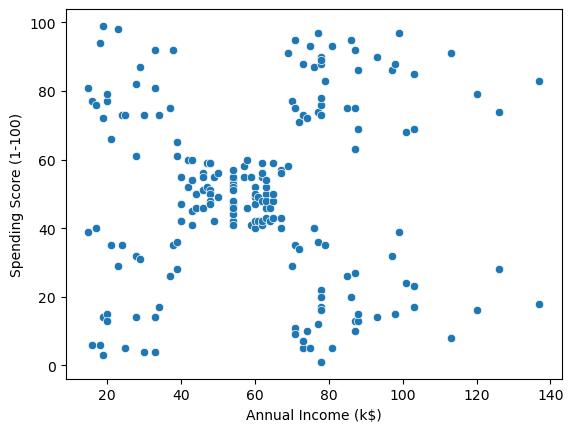

In [28]:
sns.scatterplot(data=rd,x='Annual Income (k$)',y='Spending Score (1-100)');

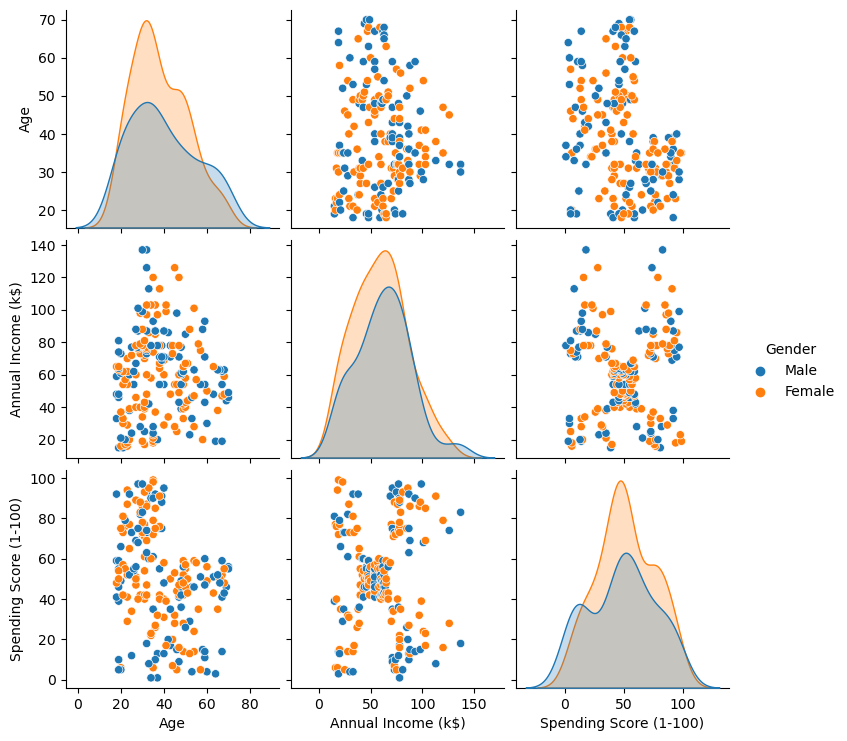

In [32]:
#rd=rd.drop('CustomerID',axis=1)
sns.pairplot(rd,hue='Gender');

In [33]:
rd.groupby(['Gender'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [34]:
rd.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


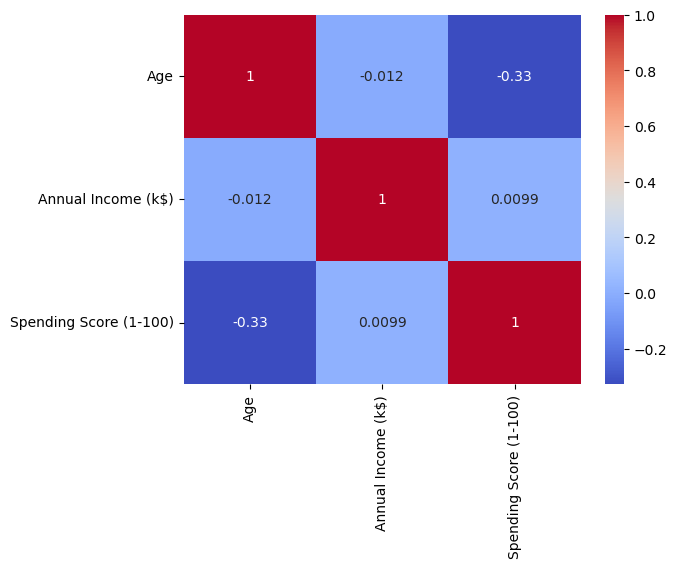

In [35]:
sns.heatmap(rd.corr(),annot=True,cmap='coolwarm');

# Clustering - Univariate, Bivariate, Multivariate

In [79]:
clustering1= KMeans(n_clusters=3)

In [80]:
clustering1.fit(rd[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [81]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [82]:
rd['Income Cluster'] = clustering1.labels_
rd.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [83]:
rd['Income Cluster'].value_counts()

1    104
2     74
0     22
Name: Income Cluster, dtype: int64

In [84]:
clustering1.inertia_

24361.259213759207

In [85]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(rd[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [86]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8534.41515455305,
 5081.484660267269,
 3941.4163614163617,
 2827.308424908425,
 2234.450395682749,
 1761.8055555555557]

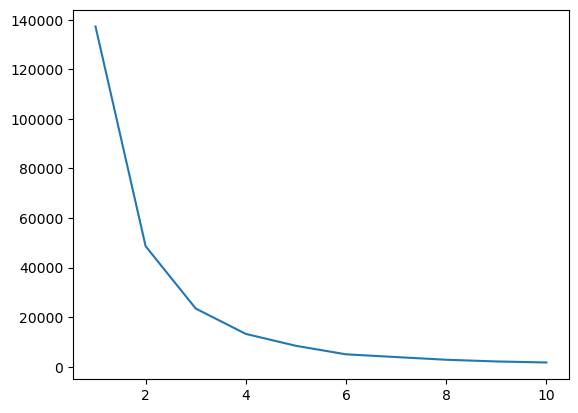

In [78]:
plt.plot(range(1,11),intertia_scores);

In [87]:
rd.groupby('Income Cluster')[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.545455,108.181818,52.000000
1,38.663462,69.750000,49.798077
2,39.500000,33.486486,50.229730


In [ ]:
#Bivariate Clustering

In [92]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(rd[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
rd['Spending and Income Cluster'] = clustering2.labels_
rd.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,2
1,Male,21,15,81,2,3
2,Female,20,16,6,2,2
3,Female,23,16,77,2,3
4,Female,31,17,40,2,2


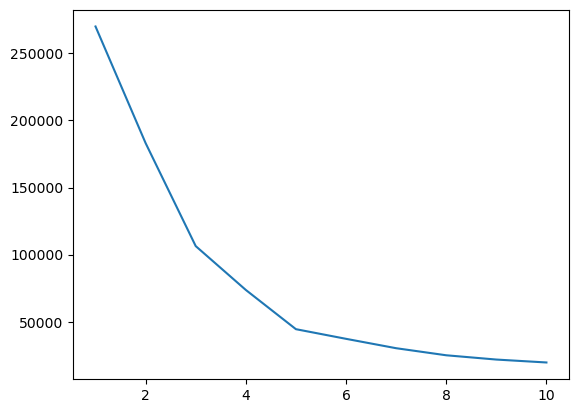

In [93]:
intertia_scores2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(rd[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [99]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,26.304348,20.913043
3,25.727273,79.363636
4,88.200000,17.114286


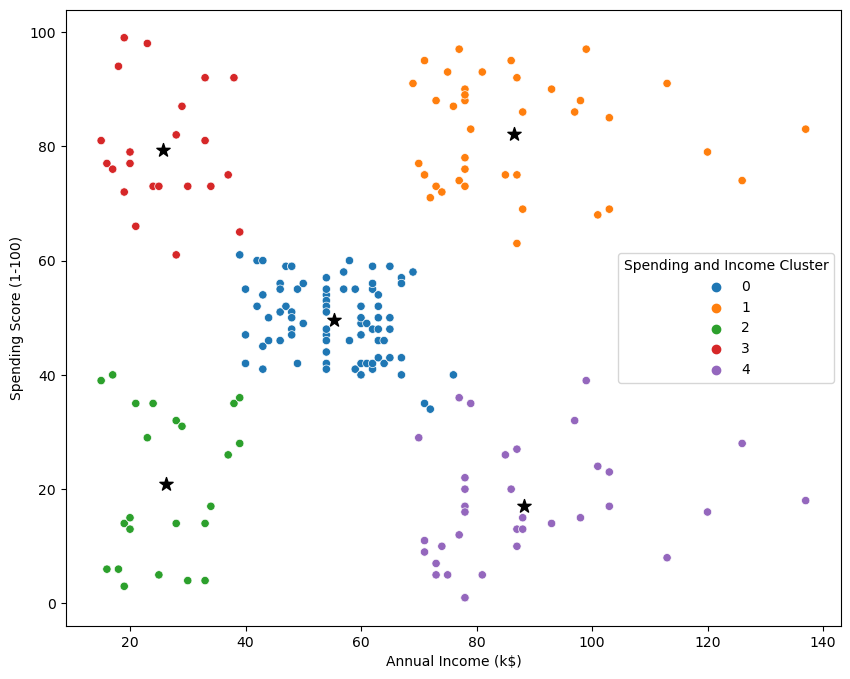

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=rd,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');
plt.savefig('Clustering_bivariate.png')

In [103]:
pd.crosstab(rd['Spending and Income Cluster'],rd['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In [104]:
rd.groupby('Spending and Income Cluster')[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


In [105]:
#Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [106]:
scale= StandardScaler()

In [120]:
re = pd.get_dummies(rd,drop_first=True)
re.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,2,1
1,21,15,81,2,3,1
2,20,16,6,2,2,0
3,23,16,77,2,3,0
4,31,17,40,2,2,0


In [121]:
re.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [122]:
re= re[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
re.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [125]:
re = pd.DataFrame(scale.fit_transform(re))
re.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


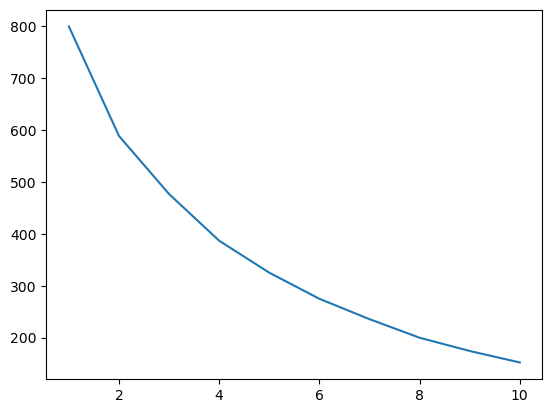

In [128]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(re)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

In [130]:
rd.to_csv('Clustering.csv')

# <font color= "red"> Insights  </font>

In [ ]:
'''
Number of Clusters: 05
Cluster Characteristics:
Cluster 0: Moderate Annual Income, Moderate Spending Score
Cluster 1: High Annual Income, High Spending Score
Cluster 2: Low Annual Income, low Spending Score 
Cluster 3: Low Annual Income, High Spending Score
Cluster 4: High Annual Income, Low Spending Score

Insights & Recommendations:
Cluster 1 represents high income customers who are willing to spend,
personalized and premium services can be offerred to retain this customers.

Cluster 2 represents customers with low income and low spending scores.
They might be price-sensitive customers, so offering discounts or cost-effective products/services could attract them.

Cluster 4 represents customers with high income but they are not spending propotionatly,
so they should be targeted with sublte marketing stratagies to influence them to spend more.

Cluster 3 is a interesting group which have low income but a very high spending score
moreover this segment constitutes around 60% women of average age of 25 so products with high brand recognition should be
marketed to them.

Cluster 0 represents customers with moderate income and moderate spending scores.
This segment may have potential for growth, so targeted marketing campaigns could be effective in increasing their spending.
'''